<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Process Process-2:
Process Process-1:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-4:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-6:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "<ipython-input-1-15a5a4

,F1,F2,F3,F4
0,tensor(-1.7606),tensor(0.9169),tensor(1.7344),tensor(1.2269)
1,tensor(0.6608),tensor(-0.4612),tensor(0.2051),tensor(0.4659)
2,tensor(1.0770),tensor(-0.1921),tensor(-3.7582),tensor(-3.6692)
3,tensor(-1.1426),tensor(0.7902),tensor(-0.3010),tensor(-0.7475)
4,tensor(-0.2602),tensor(0.1620),tensor(0.0624),tensor(-0.0285)
...,...,...,...,...
795,tensor(-1.4660),tensor(0.9203),tensor(0.2976),tensor(-0.2191)
796,tensor(-2.2130),tensor(1.1934),tensor(1.8816),tensor(1.2192)
797,tensor(1.3362),tensor(-0.8242),tensor(-0.3781),tensor(0.0842)
798,tensor(1.1633),tensor(-0.7856),tensor(0.1686),tensor(0.6119)


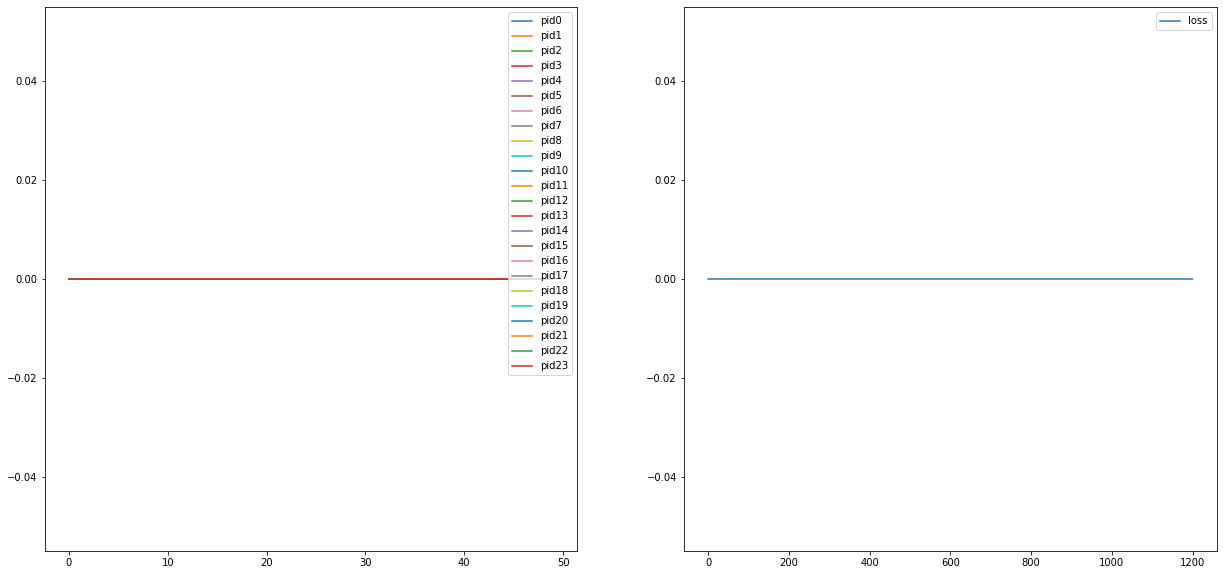

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch import multiprocessing as mp
from sklearn.datasets import make_classification
import pandas as pd
import time
from matplotlib import pyplot as plt


def getdata(size = 800):
    # time.sleep(0.3)
    x1, y1 = make_classification(n_samples=10000, n_features=4, n_classes=2, random_state=42)
    np.random.seed(int((time.time() * 1E6) % (2 ** 32 - 1)))
    idx = np.random.choice(np.arange(10000), size)
    return torch.from_numpy(x1[idx]).float(), torch.from_numpy(y1[idx]).float()


model = torch.nn.Sequential(
    torch.nn.Linear(8, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 2),
    torch.nn.Softmax(dim=1)
)
model.share_memory()
n_epochs = 50
process_num = 24


def train(arg):
    (pid1, model1, loss_history1) = arg
    loss_func = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
    for epoch in range(n_epochs):
        x1, y1 = getdata()
        y_p = model1(x1)
        optimizer.zero_grad()
        loss = loss_history1(y_p, y1)
        loss_history1[pid, epoch] = loss.item()
        loss.backward()
        optimizer.step()
loss_history = torch.zeros(process_num, n_epochs)
loss_history.share_memory_()
processes = []
for pid in range(process_num):
    p = mp.Process(target=train, args=((pid, model, loss_history),))
    processes.append(p)
    p.start()
[p.join() for p in processes]
plt.figure(figsize=(21, 10))

plt.subplot(1, 2, 1)
for i in range(process_num):
    plt.plot(np.arange(n_epochs), loss_history[i,:].numpy(), label=f'pid{i}')
plt.legend()
# show the all loss history
plt.subplot(1, 2, 2)
loss_history_1d = loss_history.T.reshape(-1)
plt.plot(np.arange(len(loss_history_1d)), loss_history_1d, label='loss')
plt.legend()











x, y = getdata()
pd.DataFrame(x, columns=['F1', 'F2', 'F3', 'F4'])

